# Spotify Festival Lineup Generator 

**Using Spotify playlists, recieve artist suggestions for a music festival line up. Enter how many are artists needed for each tier and get suggestions based on upto date data from popular Spotify playlists.**

Code from content on my masters course at UAL 

In [1]:
# Imports
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import random
import pandas as pd
import time
import urllib.request
from urllib.error import URLError
from skimage import io
import matplotlib as plt
from matplotlib import pyplot
import shutil

In [2]:
# Setting up details to access Spotify API

# The spotify ID from my 'Spotify for Developers' account
os.environ["SPOTIPY_CLIENT_ID"]='4f204ae7b63043bdac406a2440bc00dc'
os.environ["SPOTIPY_CLIENT_SECRET"]='0088b626142b48b499e6f956375ea0ad'

# Playlist URIs split into different catagories based on what tier they relate to in the line up - Chosen by me after researching Spotify playlists

# Headliners 
tophits = '37i9dQZF1DXcBWIGoYBM5M'
topglobal = '37i9dQZEVXbMDoHDwVN2tF'
radiosix = '3ryDBBvXOxZ1d0dIF2kyc2'
# Upcoming artists
hotnewbands = '37i9dQZF1DWSV5Sri2Qa60'
upcomingartists = "0mkf87VJFYqYbN7TMfVwDm"
# DJs
warehouseparty = "37i9dQZF1DX5hHfOi73rY3"
deephouse = "37i9dQZF1EId9cZrsKjzaP"

##### Tiers

There are three tier options and for each there are some hand chosen Spotify playlist, selected for their popularity and relevance to the tier.

**Headliners:** Today’s Top Hits, TOP 50 – GLOBAL, BBC Radio 6 

**Upcoming bands:** New discoveries from up and coming artists, New upcoming artists & bands 2024 	

**Electronic:** Warehouse Party, Deep House 2023

User input allows for a customised selection by asking for x amount of artists in each tier. No two results will be the same! 

In [3]:
# User inputs for customised headline suggestions 
headline = input("How many Headline acts would you like on the line-up?")
headline_no = int(headline)
dj = input("How many DJ acts would you like on the line-up?")
dj_no = int(dj)
upcoming = input("How many upcoming artists would you like on the line-up?")
upcoming_no = int(upcoming)

Rather than just pulling the top track I can pull everything and add to a dataframe. This code is adapted from my first attempt in previous notebook. 
Whilst I aimed to work mainly from code found within class notebooks/ online I did use ChatGTP when encountering errors I couldn't solve alone.  


Your line up suggestions based on upto date Spotify playlists: 
Headliners: Vampire Weekend, Feid, Dua Lipa, SZA, Taylor Swift, Jack Harlow
DJs: Chase & Status, Carlita, Chris Stussy, BLOND:ISH, PLÜM
Upcoming artists: Biancallove, Tommy Exley, GANS, Kendra Erika


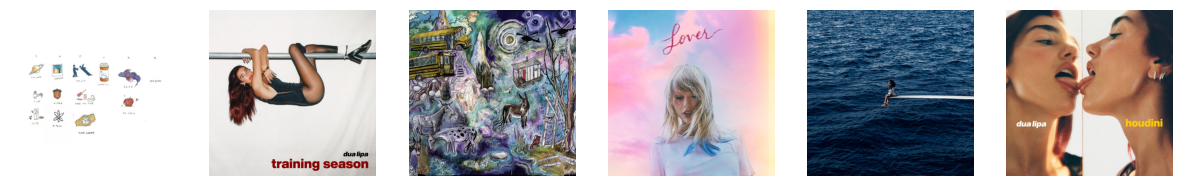

In [4]:
# Initialzing Spotify client using the Spotipy library https://spotipy.readthedocs.io/en/2.22.1/ as suggested by classmate Josie who was refered by Louie
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

headline = [tophits,topglobal,radiosix], "headline"
upcoming = [hotnewbands,upcomingartists], "upcoming"
dj = [warehouseparty, deephouse], "dj"

all_uris = [headline, upcoming, dj]
artist_name = []
artist_ids = []
artist_images = []
tier = []

# Mostly coded alone with some tips from ChatGTP along the way when finding an error. 
for type, playlist_type in all_uris:
        for uri in type:
            result = spotify.playlist_tracks(uri)
            tracks = result["items"]
            for track in tracks:
                tier.append(playlist_type)
                artist_name.append(track["track"]["artists"][0]["name"])
                artist_ids.append(track["track"]["artists"][0]["id"])

                # ChatGTP helped write this bit:
                album_images = track.get("track", {}).get("album", {}).get("images", [])
                if album_images:
                    # Assuming you want to use the first image URL from the album if available
                    artist_images.append(album_images[0].get("url", None))
                else:
                    artist_images.append(None)

# ChatGTP helped write this bit as well as # https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
data = {"Artist Name": artist_name, "Artist ID": artist_ids,"Artist Image": artist_images, "Tier": tier }
df = pd.DataFrame(data)


def get_lineup(tier_type, number):
    # https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
    possibilities = df[df['Tier'].isin(tier_type)]
    lineup = random.sample(possibilities['Artist Name'].tolist(), min(number, len(possibilities)))
    selected_images = possibilities[possibilities['Artist Name'].isin(lineup)]['Artist Image'].tolist()
    # Remove duplicates  - https://www.programiz.com/python-programming/methods/dictionary/fromkeys#google_vignette, https://stackoverflow.com/questions/8749158/removing-duplicates-from-dictionary 
    lineup = list(dict.fromkeys(lineup))
    return lineup, selected_images


headline_lineup = get_lineup(headline, headline_no) 
dj_lineup = get_lineup(dj, dj_no)
upcoming_lineup = get_lineup(upcoming, upcoming_no)

# I wanted to try and gather images for each tier however was unsuccesful 
# final = [{'Headliners':headline_lineup[1], 'Djs':dj_lineup[1], "upcoming":upcoming_lineup[1]}]


headliners = ', '.join(str(x) for x in headline_lineup[0])
djs = ', '.join(str(x) for x in dj_lineup[0])
upcomers = ', '.join(str(x) for x in upcoming_lineup[0])

print("Your line up suggestions based on upto date Spotify playlists: ")
print("Headliners: " + headliners)
print("DJs: " + djs)
print("Upcoming artists: " + upcomers)

# Now print a little poster
# make directory to put images into
# From class notebook
def download_image(img_list, file_path):
    filename = '{}.jpg'.format(img_list[0])
    fullpath = '{}{}'.format(file_path, filename)
    try: 
        urllib.request.urlretrieve(img_list[1], fullpath) 
    except URLError:
        print(f"Error downloading: {img_list[0]}")
        errorlist.append(img_list[0])
    except:
        print(f"Error downloading: {img_list[0]}")
        errorlist.append(img_list[0])

directory = "artist_images"
file_path = os.path.join("data/", directory + "/")  
os.mkdir(file_path) 

for img_list in zip(headline_lineup[0], headline_lineup[1]):
    download_image(img_list, file_path)
    errorlist= []
    t1 = time.perf_counter()

fig, axes = plt.pyplot.subplots(1, len(headline_lineup[0]), figsize=(15, 5))

for i, img_list in enumerate(zip(headline_lineup[0], headline_lineup[1])):
    download_image(img_list, file_path)
    image_path = os.path.join(file_path, f'{img_list[0]}.jpg')
    try:
        image = io.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis labels
    except Exception as e:
        print(f"Error reading or displaying image: {image_path} - {e}")

# https://stackoverflow.com/questions/10873364/shutil-rmtree-clarification
shutil.rmtree(file_path)